### Attempt to construct a bayes probability based trigger for the SD

recall **P(signal | bins) = P(bins | signal) * P(signal) / P(bins)**

Let's calculate **P(bins)** first, from random traces

In [1]:
from TriggerStudyBinaries_v4 import *

AllBackgroundEvents = EventGenerator(["19_19.5"], real_background = True, prior = 0, force_inject = 0, split = 1, step = 1)

# increase number of background traces
AllBackgroundEvents.files = np.zeros(int(1e5))

2022-08-15 11:09:48.810344: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-15 11:09:48.810388: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
import pandas as pd
import seaborn as sns

bin_distributions = [[] for i in range(AllBackgroundEvents.window_length)]

for batch in range(AllBackgroundEvents.__len__()):

    print(f"Processing batch {batch}: {100 * (batch/AllBackgroundEvents.__len__()):.2f}%", end = "\r")

    traces, _ = AllBackgroundEvents.__getitem__(batch, full_trace = True)

    for bin in range(0, AllBackgroundEvents.window_length):
        bin_distributions[bin].append(
            np.mean(traces[0].Baseline[:,0 + bin : AllBackgroundEvents.length - AllBackgroundEvents.window_length + bin])
        )

<AxesSubplot:>

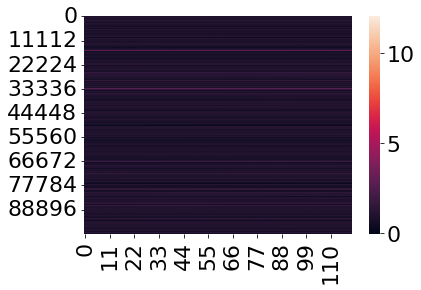

In [ ]:
bin_distributions = np.array(bin_distributions)
data = pd.DataFrame(bin_distributions, columns = [f"bin {i}" for i in range(1,120s)])



sns.heatmap(data.transpose())